[-73.59  -73.588 -73.586 -73.584 -73.582 -73.58  -73.578 -73.576 -73.574
 -73.572 -73.57  -73.568 -73.566 -73.564 -73.562 -73.56  -73.558 -73.556
 -73.554 -73.552 -73.55 ]
[45.49  45.492 45.494 45.496 45.498 45.5   45.502 45.504 45.506 45.508
 45.51  45.512 45.514 45.516 45.518 45.52  45.522 45.524 45.526 45.528]


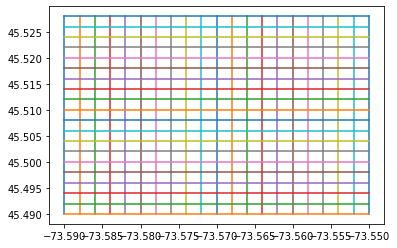

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
fig = plt.figure()
ax = plt.axes()
xs = np.arange(-73.59, -73.55, 0.002)
print(xs)
ys = np.arange(45.49, 45.53, 0.002)
print(ys)
lat, lon = np.meshgrid(xs,ys)
for x in xs:
    plt.plot([x, x], [ys[0], ys[-1]])
for y in ys:
    plt.plot([xs[0], xs[-1]], [y, y])
plt.show()

In [5]:
shapeFile = gpd.read_file("Shape/crime_dt.shp")

In [16]:
for geom in shapeFile.geometry:
    print(geom.x , geom.y)

-73.559521738 45.51703068770001
-73.5550997957 45.5218477274
-73.5835927935 45.490119618
-73.58794455479999 45.522974386899996
-73.5528028932 45.5242964845
-73.5533417463 45.509088032600005
-73.5533417463 45.509088032600005
-73.5593055777 45.5172635889
-73.5716866993 45.5076658438
-73.5528028932 45.5242964845
-73.55992859140001 45.5165738416
-73.5557276541 45.5211905396
-73.5593055777 45.5172635889
-73.5611000342 45.5153162602
-73.5531998136 45.5053616716
-73.55625131800001 45.5012135892
-73.5857752959 45.4900685085
-73.5575067829 45.5018141133
-73.5637508307 45.4942987771
-73.5500575259 45.511046684200004
-73.5519488395 45.5075505924
-73.5657193776 45.5207802731
-73.5692132452 45.5130349892
-73.56746196659999 45.5169098979
-73.5692132452 45.5130349892
-73.5652258079 45.523811343
-73.56556132979999 45.521365268900006
-73.5765360188 45.511840376
-73.5864159139 45.520833259300005
-73.5680944891 45.511879356
-73.5665880471 45.5118352522
-73.5893387245 45.5214570657
-73.5817032307 45.51801

-73.5533417463 45.509088032600005
-73.5533417463 45.509088032600005
-73.5565694123 45.4944870543
-73.55489206909999 45.499404710200004
-73.58098613279999 45.49235313810001
-73.58098613279999 45.49235313810001
-73.58098613279999 45.49235313810001
-73.58098613279999 45.49235313810001
-73.58098613279999 45.49235313810001
-73.58098613279999 45.49235313810001
-73.58098613279999 45.49235313810001
-73.58098613279999 45.49235313810001
-73.58098613279999 45.49235313810001
-73.58098613279999 45.49235313810001
-73.57511108979999 45.5150424176
-73.57511108979999 45.5150424176
-73.57511108979999 45.5150424176
-73.57511108979999 45.5150424176
-73.57511108979999 45.5150424176
-73.57511108979999 45.5150424176
-73.57511108979999 45.5150424176
-73.57511108979999 45.5150424176
-73.57511108979999 45.5150424176
-73.57511108979999 45.5150424176
-73.57511108979999 45.5150424176
-73.5753698828 45.5213064789
-73.5753698828 45.5213064789
-73.5747243125 45.5082173002
-73.5779696877 45.516327284
-73.5604041398 45

-73.5828093881 45.5204588346
-73.5828093881 45.5204588346
-73.5828093881 45.5204588346
-73.5828093881 45.5204588346
-73.5828093881 45.5204588346
-73.5828093881 45.5204588346
-73.5828093881 45.5204588346
-73.5828093881 45.5204588346
-73.5828093881 45.5204588346
-73.5828093881 45.5204588346
-73.5614307188 45.51056438
-73.5614307188 45.51056438
-73.5614307188 45.51056438
-73.5614307188 45.51056438
-73.5754454509 45.500217133199996
-73.5754454509 45.500217133199996
-73.5754454509 45.500217133199996
-73.5754454509 45.500217133199996
-73.5754454509 45.500217133199996
-73.5754454509 45.500217133199996
-73.5754454509 45.500217133199996
-73.5754454509 45.500217133199996
-73.5754454509 45.500217133199996
-73.5754454509 45.500217133199996
-73.5754454509 45.500217133199996
-73.5754454509 45.500217133199996
-73.5754454509 45.500217133199996
-73.5754454509 45.500217133199996
-73.5754454509 45.500217133199996
-73.5754454509 45.500217133199996
-73.5754454509 45.500217133199996
-73.5754454509 45.500217

-73.5727069106 45.5178437741
-73.5727069106 45.5178437741
-73.5727069106 45.5178437741
-73.5622115779 45.503197694300006
-73.5554645902 45.5192649912
-73.5554645902 45.5192649912
-73.5554645902 45.5192649912
-73.5554645902 45.5192649912
-73.5554645902 45.5192649912
-73.5554645902 45.5192649912
-73.5575026242 45.5170098558
-73.5575026242 45.5170098558
-73.5575026242 45.5170098558
-73.5575026242 45.5170098558
-73.5575026242 45.5170098558
-73.5575026242 45.5170098558
-73.5542808737 45.5205139084
-73.5556216666 45.506199081300004
-73.5556216666 45.506199081300004
-73.5556216666 45.506199081300004
-73.5556216666 45.506199081300004
-73.5556216666 45.506199081300004
-73.5556216666 45.506199081300004
-73.5556216666 45.506199081300004
-73.5665880471 45.5118352522
-73.5665880471 45.5118352522
-73.5665880471 45.5118352522
-73.5662756332 45.512793783
-73.5662756332 45.512793783
-73.5662756332 45.512793783
-73.5662756332 45.512793783
-73.5662756332 45.512793783
-73.5662756332 45.512793783
-73.56627

-73.5768508228 45.509215362
-73.5768508228 45.509215362
-73.5768508228 45.509215362
-73.5768508228 45.509215362
-73.5768508228 45.509215362
-73.5768508228 45.509215362
-73.5768508228 45.509215362
-73.5768508228 45.509215362
-73.5768508228 45.509215362
-73.5768508228 45.509215362
-73.5768508228 45.509215362
-73.5828628221 45.4980114528
-73.5828628221 45.4980114528
-73.5828628221 45.4980114528
-73.5874573824 45.523501887200005
-73.5874573824 45.523501887200005
-73.5874573824 45.523501887200005
-73.5768508228 45.509215362
-73.5768508228 45.509215362
-73.5768508228 45.509215362
-73.5768508228 45.509215362
-73.5768508228 45.509215362
-73.5768508228 45.509215362
-73.5768508228 45.509215362
-73.5768508228 45.509215362
-73.5768508228 45.509215362
-73.5768508228 45.509215362
-73.5768508228 45.509215362
-73.5769985132 45.512868017200006
-73.5769985132 45.512868017200006
-73.5769985132 45.512868017200006
-73.5769985132 45.512868017200006
-73.5769985132 45.512868017200006
-73.5525136796 45.5101309

-73.5596696105 45.514642126400005
-73.5596696105 45.514642126400005
-73.5596696105 45.514642126400005
-73.5596696105 45.514642126400005
-73.5596696105 45.514642126400005
-73.5596696105 45.514642126400005
-73.55586607640001 45.5188193656
-73.55586607640001 45.5188193656
-73.55586607640001 45.5188193656
-73.55586607640001 45.5188193656
-73.55586607640001 45.5188193656
-73.55586607640001 45.5188193656
-73.55586607640001 45.5188193656
-73.55586607640001 45.5188193656
-73.55586607640001 45.5188193656
-73.55586607640001 45.5188193656
-73.55586607640001 45.5188193656
-73.55586607640001 45.5188193656
-73.55586607640001 45.5188193656
-73.55586607640001 45.5188193656
-73.55586607640001 45.5188193656
-73.55586607640001 45.5188193656
-73.55586607640001 45.5188193656
-73.55586607640001 45.5188193656
-73.55586607640001 45.5188193656
-73.5596696105 45.514642126400005
-73.55586607640001 45.5188193656
-73.5713447208 45.529410930699996
-73.58280716430001 45.4926352747
-73.58280716430001 45.4926352747
-7

-73.55810097140001 45.5163616585
-73.55810097140001 45.5163616585
-73.55810097140001 45.5163616585
-73.55810097140001 45.5163616585
-73.55810097140001 45.5163616585
-73.55810097140001 45.5163616585
-73.55810097140001 45.5163616585
-73.55810097140001 45.5163616585
-73.55810097140001 45.5163616585
-73.5754885138 45.5158745309
-73.5739630921 45.5177254035
-73.5739630921 45.5177254035
-73.5739630921 45.5177254035
-73.5528595097 45.4987799266
-73.5528595097 45.4987799266
-73.5604224946 45.5243151143
-73.5604224946 45.5243151143
-73.5604224946 45.5243151143
-73.5604224946 45.5243151143
-73.5604224946 45.5243151143
-73.5604224946 45.5243151143
-73.5604224946 45.5243151143
-73.5604224946 45.5243151143
-73.5837537575 45.5025016339
-73.5837537575 45.5025016339
-73.55339394890001 45.5002346531
-73.5837537575 45.5025016339
-73.5758954068 45.5185963067
-73.5758954068 45.5185963067
-73.5758954068 45.5185963067
-73.5758954068 45.5185963067
-73.5758954068 45.5185963067
-73.5758954068 45.5185963067
-73

-73.580430261 45.4928169509
-73.580430261 45.4928169509
-73.580430261 45.4928169509
-73.580430261 45.4928169509
-73.580430261 45.4928169509
-73.580430261 45.4928169509
-73.580430261 45.4928169509
-73.580430261 45.4928169509
-73.580430261 45.4928169509
-73.580430261 45.4928169509
-73.580430261 45.4928169509
-73.580430261 45.4928169509
-73.580430261 45.4928169509
-73.580430261 45.4928169509
-73.580430261 45.4928169509
-73.58259193020001 45.4940902091
-73.58259193020001 45.4940902091
-73.58259193020001 45.4940902091
-73.58259193020001 45.4940902091
-73.58259193020001 45.4940902091
-73.58259193020001 45.4940902091
-73.58259193020001 45.4940902091
-73.580430261 45.4928169509
-73.5838319751 45.525789523
-73.5838319751 45.525789523
-73.5838319751 45.525789523
-73.5838319751 45.525789523
-73.5599200424 45.5213503795
-73.5599200424 45.5213503795
-73.5599200424 45.5213503795
-73.5599200424 45.5213503795
-73.5599200424 45.5213503795
-73.5789451921 45.524609715699995
-73.5789451921 45.524609715699

-73.5677447968 45.505373642200006
-73.5677447968 45.505373642200006
-73.5677447968 45.505373642200006
-73.5677447968 45.505373642200006
-73.5677447968 45.505373642200006
-73.5677447968 45.505373642200006
-73.5677447968 45.505373642200006
-73.5677447968 45.505373642200006
-73.5677447968 45.505373642200006
-73.5677447968 45.505373642200006
-73.5677447968 45.505373642200006
-73.5677447968 45.505373642200006
-73.5844745251 45.5205762143
-73.5844745251 45.5205762143
-73.5706230233 45.5214467288
-73.55992859140001 45.5165738416
-73.5844745251 45.5205762143
-73.55992859140001 45.5165738416
-73.55992859140001 45.5165738416
-73.5689860549 45.513539046700004
-73.55992859140001 45.5165738416
-73.55992859140001 45.5165738416
-73.55992859140001 45.5165738416
-73.55992859140001 45.5165738416
-73.55992859140001 45.5165738416
-73.55992859140001 45.5165738416
-73.5689860549 45.513539046700004
-73.55992859140001 45.5165738416
-73.55992859140001 45.5165738416
-73.55992859140001 45.5165738416
-73.55992859

-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5838135532 45.4995939532
-73.5814121068 45.495074541099996
-73.5814121068 45.495074541099996
-73.5814121068 45.495074541099996
-73.5814121068 45.495074541099996
-73.5814121068 45.495074541099996
-73.5814121068 45.495074541099996
-73.5814121068 45.495074541099996
-73.569072979 45.4929503883
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.5716959228 45.4973898097
-73.57169

-73.57681899810001 45.5197167285
-73.57681899810001 45.5197167285
-73.57681899810001 45.5197167285
-73.57681899810001 45.5197167285
-73.57681899810001 45.5197167285
-73.5690156015 45.5163088299
-73.5690156015 45.5163088299
-73.5690156015 45.5163088299
-73.5817045499 45.4935747865
-73.5817045499 45.4935747865
-73.5817045499 45.4935747865
-73.5817045499 45.4935747865
-73.5817045499 45.4935747865
-73.5817045499 45.4935747865
-73.5817045499 45.4935747865
-73.5817045499 45.4935747865
-73.5817045499 45.4935747865
-73.5817045499 45.4935747865
-73.5817045499 45.4935747865
-73.5817045499 45.4935747865
-73.585161752 45.5241176542
-73.5685686213 45.518436075699995
-73.5685686213 45.518436075699995
-73.5685686213 45.518436075699995
-73.5685686213 45.518436075699995
-73.5685686213 45.518436075699995
-73.5685686213 45.518436075699995
-73.5685686213 45.518436075699995
-73.5685686213 45.518436075699995
-73.5662576592 45.4924661489
-73.5662576592 45.4924661489
-73.5740664818 45.5043708658
-73.574066481

-73.5703826378 45.4987837196
-73.55743182020001 45.4933033105
-73.5765762959 45.5018451153
-73.5733782309 45.500235441899996
-73.5792584633 45.4938211057
-73.5757087504 45.497188967
-73.5669460985 45.5062964608
-73.55854271140001 45.518128009399994
-73.57748070619999 45.4980536356
-73.574276293 45.4986343907
-73.5731349863 45.4958811096
-73.5640385774 45.520671699
-73.5677447968 45.505373642200006
-73.574276293 45.4986343907
-73.57748070619999 45.4980536356
-73.57748070619999 45.4980536356
-73.55707123970001 45.5174573649
-73.5729192723 45.500011818800004
-73.57748070619999 45.4980536356
-73.5648123354 45.508732700699994
-73.55894956659999 45.5176577414
-73.5597912434 45.5064129282
-73.5765762959 45.5018451153
-73.56922667 45.5037734272
-73.5729192723 45.500011818800004
-73.5792584633 45.4938211057
-73.57951486350001 45.4923020167
-73.573595821 45.4993186313
-73.5783864306 45.493304296800005
-73.5669460985 45.5062964608
-73.5688208429 45.5041896878
-73.5785333909 45.494430477200005
-73

-73.5683185997 45.5047344033
-73.57748070619999 45.4980536356
-73.57748070619999 45.4980536356
-73.5571113981 45.49892304270001
-73.5785333909 45.494430477200005
-73.5523836863 45.5153296062
-73.5785333909 45.494430477200005
-73.5813099425 45.4906836869
-73.5813099425 45.4906836869
-73.5688208429 45.5041896878
-73.5677447968 45.505373642200006
-73.573595821 45.4993186313
-73.5785333909 45.494430477200005
-73.57748070619999 45.4980536356
-73.57748070619999 45.4980536356
-73.5805733152 45.522894978000004
-73.5805733152 45.522894978000004
-73.5829190652 45.523963497
-73.58478182399999 45.5283038817
-73.58478182399999 45.5283038817
-73.5569783083 45.5121384141
-73.563310792 45.5150357186
-73.5569783083 45.5121384141
-73.5847278286 45.5247765245
-73.5805733152 45.522894978000004
-73.5703332831 45.5182344413
-73.5725951152 45.5192463457
-73.58602306479999 45.5253765699
-73.55894956659999 45.5176577414
-73.58280433350001 45.5168294663
-73.5608562767 45.506913803
-73.58280433350001 45.51682946

-73.5549071438 45.5164786339
-73.57748070619999 45.4980536356
-73.55854271140001 45.518128009399994
-73.5724011562 45.4966281237
-73.5569434552 45.5023245616
-73.5660162308 45.4975229997
-73.576893537 45.498768085200005
-73.57871990609999 45.4996707072
-73.5595916359 45.5041375373
-73.5583996407 45.5269940887
-73.5764428011 45.5063997773
-73.5734843685 45.5049730746
-73.576893537 45.498768085200005
-73.5611975331 45.5283100245
-73.5779396887 45.5081050469
-73.55897457399999 45.4998722138
-73.5779396887 45.5081050469
-73.5762673469 45.5098090188
-73.57300464779999 45.5133385751
-73.575022599 45.497886807600004
-73.56922667 45.5037734272
-73.5528399871 45.49814067770001
-73.5814121068 45.495074541099996
-73.5636844875 45.5189007412
-73.559521738 45.51703068770001
-73.5735974885 45.523223034
-73.58248229819999 45.527266251
-73.5858567201 45.4914362208
-73.559521738 45.51703068770001
-73.559521738 45.51703068770001
-73.559521738 45.51703068770001
-73.55660937649999 45.499409981999996
-73.5

-73.5608098596 45.5297049999
-73.5608098596 45.5297049999
-73.5608098596 45.5297049999
-73.5608098596 45.5297049999
-73.5608098596 45.5297049999
-73.5688405653 45.5071946104
-73.5688405653 45.5071946104
-73.5688405653 45.5071946104
-73.5688405653 45.5071946104
-73.5688405653 45.5071946104
-73.5688405653 45.5071946104
-73.5681049319 45.506848567
-73.5681049319 45.506848567
-73.5681049319 45.506848567
-73.57728036649999 45.5011202582
-73.58248190399999 45.4957249458
-73.5533267088 45.5062146812
-73.57581163100001 45.5070813336
-73.5533267088 45.5062146812
-73.5527975161 45.5069129258
-73.5817292421 45.496563817600006
-73.5665447003 45.5189500238
-73.5665447003 45.5189500238
-73.5593048033 45.5289904102
-73.556707225 45.5144492967
-73.5742980057 45.522484702700005
-73.581117013 45.525975959200004
-73.56103607979999 45.5164091603
-73.556707225 45.5144492967
-73.5721513241 45.521514251499994
-73.5721513241 45.521514251499994
-73.5789451921 45.524609715699995
-73.556707225 45.5144492967
-73.

-73.55590242699999 45.5231476242
-73.57294577100001 45.5269380706
-73.5563661169 45.506488645699996
-73.5856730658 45.500204962299996
-73.57244682310001 45.5274534201
-73.5582003975 45.504228553900006
-73.5667686253 45.51060431609999
-73.57078147909999 45.512387393100006
-73.5868504105 45.5195727754
-73.56026103159999 45.5076949657
-73.58983070149999 45.520930264300006
-73.5821837226 45.5174851245
-73.5846062709 45.4987953695
-73.57883700069999 45.5159802499
-73.56026103159999 45.5076949657
-73.56026103159999 45.5076949657
-73.5680243864 45.503789734799994
-73.582629505 45.4909473304
-73.5719609402 45.528744654300006
-73.5571664529 45.5001828053
-73.5679527967 45.5124433712
-73.5679527967 45.5124433712
-73.5679527967 45.5124433712
-73.5861584983 45.52684060399999
-73.55140244430001 45.509881718500004
-73.55140244430001 45.509881718500004
-73.55140244430001 45.509881718500004
-73.5563661169 45.506488645699996
-73.5856730658 45.500204962299996
-73.5765360188 45.511840376
-73.575042917 45

-73.5716056304 45.5013500871
-73.56922667 45.5037734272
-73.582629505 45.4909473304
-73.5796444144 45.523898348
-73.5796444144 45.523898348
-73.5796444144 45.523898348
-73.5796444144 45.523898348
-73.5796444144 45.523898348
-73.5796444144 45.523898348
-73.5749665087 45.521750887399996
-73.5749665087 45.521750887399996
-73.560770165 45.5191407956
-73.5503274209 45.5143673554
-73.55623300939999 45.499853673800004
-73.5716056304 45.5013500871
-73.569072979 45.4929503883
-73.5792584633 45.4938211057
-73.5729192723 45.500011818800004
-73.5792584633 45.4938211057
-73.5716056304 45.5013500871
-73.57748070619999 45.4980536356
-73.5757087504 45.497188967
-73.575022599 45.497886807600004
-73.5503274209 45.5143673554
-73.5549071438 45.5164786339
-73.5731349863 45.4958811096
-73.5731349863 45.4958811096
-73.5801176812 45.5082062301
-73.5801176812 45.5082062301
-73.5734843685 45.5049730746
-73.5774769093 45.5069002299
-73.5582593866 45.5057380999
-73.5604096751 45.503195629
-73.5582593866 45.505738

-73.57581163100001 45.5070813336
-73.5700431796 45.51111190859999
-73.5881404004 45.528533615
-73.57728036649999 45.5011202582
-73.5765762959 45.5018451153
-73.5729572767 45.50555038270001
-73.551952418 45.5086304194
-73.551952418 45.5086304194
-73.58487824640001 45.520128703400005
-73.58887143 45.490436005
-73.5647804562 45.505274237399995
-73.5647804562 45.505274237399995
-73.5647804562 45.505274237399995
-73.5647804562 45.505274237399995
-73.5647804562 45.505274237399995
-73.5647804562 45.505274237399995
-73.5647804562 45.505274237399995
-73.5632578025 45.519638856499995
-73.5632578025 45.519638856499995
-73.5632578025 45.519638856499995
-73.5632578025 45.519638856499995
-73.5582471443 45.4922278083
-73.5742529533 45.5088745014
-73.5742529533 45.5088745014
-73.55894956659999 45.5176577414
-73.5848617817 45.490870053
-73.5848617817 45.490870053
-73.55992859140001 45.5165738416
-73.5603481596 45.5161035529
-73.5716866993 45.5076658438
-73.5729389422 45.5276867051
-73.5858567201 45.491

-73.5606169882 45.5175225586
-73.5858567201 45.4914362208
-73.55517295050001 45.4990139798
-73.5814121068 45.495074541099996
-73.559521738 45.51703068770001
-73.559521738 45.51703068770001
-73.5829190652 45.523963497
-73.5725951152 45.5192463457
-73.5879564082 45.5262601332
-73.56191141869999 45.514390651599996
-73.5758720108 45.5207409388
-73.55664504229999 45.504926695900004
-73.5575505819 45.5250049837
-73.5596915875 45.5112288634
-73.5842381531 45.496391672600005
-73.5575808007 45.4984662804
-73.56295375 45.5201609409
-73.5688208429 45.5041896878
-73.5815368842 45.491884818
-73.5815368842 45.491884818
-73.5688208429 45.5041896878
-73.5731349863 45.4958811096
-73.5683185997 45.5047344033
-73.5731349863 45.4958811096
-73.5731349863 45.4958811096
-73.5731349863 45.4958811096
-73.5792584633 45.4938211057
-73.5783864306 45.493304296800005
-73.5698074665 45.5031767478
-73.5792584633 45.4938211057
-73.58484187479999 45.5296290479
-73.5879507998 45.5237289608
-73.55810097140001 45.51636165

-73.5893387245 45.5214570657
-73.567436958 45.5099030637
-73.5742174832 45.5026168118
-73.5856730658 45.500204962299996
-73.5856730658 45.500204962299996
-73.5719974594 45.5279170404
-73.5856730658 45.500204962299996
-73.5856730658 45.500204962299996
-73.575042917 45.525198330500004
-73.5639246463 45.5279454819
-73.5660883792 45.519992690900004
-73.5665447003 45.5189500238
-73.56746196659999 45.5169098979
-73.5757418469 45.5026825347
-73.5582003975 45.504228553900006
-73.5719974594 45.5279170404
-73.5856730658 45.500204962299996
-73.5856730658 45.500204962299996
-73.57294577100001 45.5269380706
-73.5544234524 45.5109868727
-73.5640305545 45.5062051875
-73.5647505732 45.525350618100006
-73.5692132452 45.5130349892
-73.56879456989999 45.5139485901
-73.578568347 45.5040549828
-73.578568347 45.5040549828
-73.5868504105 45.5195727754
-73.5880419858 45.518182626400005
-73.5740050202 45.5015885729
-73.5582003975 45.504228553900006
-73.575042917 45.525198330500004
-73.5563661169 45.50648864569

-73.5537972595 45.5017085333
-73.55447191430001 45.5224962103
-73.5563661169 45.506488645699996
-73.5856730658 45.500204962299996
-73.5856730658 45.500204962299996
-73.5856730658 45.500204962299996
-73.5713225669 45.500276318999994
-73.5537972595 45.5017085333
-73.5713225669 45.500276318999994
-73.5856730658 45.500204962299996
-73.5612612304 45.5004403954
-73.561988668 45.505244382
-73.5537960696 45.5120940562
-73.5640305545 45.5062051875
-73.5612612304 45.5004403954
-73.5563661169 45.506488645699996
-73.5856730658 45.500204962299996
-73.5856730658 45.500204962299996
-73.55883710180001 45.5033179376
-73.5856730658 45.500204962299996
-73.5856730658 45.500204962299996
-73.5563661169 45.506488645699996
-73.58124124609999 45.5184993524
-73.5740050202 45.5015885729
-73.57294577100001 45.5269380706
-73.57244682310001 45.5274534201
-73.5856730658 45.500204962299996
-73.57244682310001 45.5274534201
-73.5722080296 45.5007146433
-73.5856730658 45.500204962299996
-73.5856730658 45.500204962299996

-73.5745725535 45.5147949272
-73.5556216666 45.506199081300004
-73.5692132452 45.5130349892
-73.5680944891 45.511879356
-73.5692132452 45.5130349892
-73.5726124697 45.5139102242
-73.5678559902 45.5093569444
-73.5620671965 45.513109498999995
-73.5620671965 45.513109498999995
-73.5692132452 45.5130349892
-73.57591155850001 45.5154153226
-73.58638033609999 45.520102228999995
-73.5840471659 45.5190539996
-73.57591155850001 45.5154153226
-73.5745725535 45.5147949272
-73.57591155850001 45.5154153226
-73.5789376392 45.5174514292
-73.5754885138 45.5158745309
-73.5679527967 45.5124433712
-73.57049329770001 45.512976778500004
-73.57511108979999 45.5150424176
-73.5692132452 45.5130349892
-73.5694352732 45.5124994487
-73.5665880471 45.5118352522
-73.5859247591 45.5206003372
-73.57591155850001 45.5154153226
-73.5859247591 45.5206003372
-73.5817032307 45.518016384300005
-73.5771858562 45.5159723791
-73.5726124697 45.5139102242
-73.5888761322 45.521961337
-73.5745725535 45.5147949272
-73.5599620151 4

-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5563661169 45.506488645699996
-73.5707969138 45.5291563381
-73.5743440748 45.5256616828
-73.5743440748 45.5256616828
-73.5701711639 45.529802259700006
-73.5817032307 45.518016384300005
-73.5799921871 45.519824691000004
-73.5596939052 45.5021612128
-73.5780824053 45.497401486899996


-73.5591545672 45.5261694654
-73.5573809324 45.5280735571
-73.576893537 45.498768085200005
-73.576893537 45.498768085200005
-73.576893537 45.498768085200005
-73.576893537 45.498768085200005
-73.576893537 45.498768085200005
-73.576893537 45.498768085200005
-73.576893537 45.498768085200005
-73.576893537 45.498768085200005
-73.576893537 45.498768085200005
-73.576893537 45.498768085200005
-73.576893537 45.498768085200005
-73.5587321754 45.5225927847
-73.55750973939999 45.523893693299996
-73.5592807054 45.522003106199996
-73.5599200424 45.5213503795
-73.5599200424 45.5213503795
-73.5599200424 45.5213503795
-73.55879622409999 45.5265551146
-73.5560726145 45.529419483999995
-73.5560726145 45.529419483999995
-73.5617333392 45.522193491
-73.5617333392 45.522193491
-73.5617333392 45.522193491
-73.5617333392 45.522193491
-73.5531376704 45.526113951199996
-73.554813259 45.5207635488
-73.554813259 45.5207635488
-73.554813259 45.5207635488
-73.5565046841 45.5224859365
-73.5525136796 45.5101309642
-7

-73.5579173765 45.500440691099996
-73.5579173765 45.500440691099996
-73.5579173765 45.500440691099996
-73.55489206909999 45.499404710200004
-73.5571664529 45.5001828053
-73.5609083732 45.505179535699995
-73.58373771229999 45.4931708137
-73.58373771229999 45.4931708137
-73.58373771229999 45.4931708137
-73.5710813529 45.504660721
-73.5798184967 45.495166271
-73.5798184967 45.495166271
-73.5798184967 45.495166271
-73.5798184967 45.495166271
-73.5798184967 45.495166271
-73.5798184967 45.495166271
-73.5798184967 45.495166271
-73.5798184967 45.495166271
-73.5798184967 45.495166271
-73.5798184967 45.495166271
-73.5798184967 45.495166271
-73.5798184967 45.495166271
-73.5604619506 45.5137280649
-73.5604619506 45.5137280649
-73.5544969268 45.507643888500006
-73.5544969268 45.507643888500006
-73.5557893383 45.5003319242
-73.5557893383 45.5003319242
-73.55418179520001 45.5030647751
-73.55869146020001 45.5001989579
-73.553946485 45.5153288789
-73.5833250254 45.4976260464
-73.5553202402 45.516010733

-73.5808354359 45.51893034890001
-73.57588830430001 45.5242817532
-73.5895881166 45.5286724678
-73.5895881166 45.5286724678
-73.5838319751 45.525789523
-73.5838319751 45.525789523
-73.5533415789 45.510482526800004
-73.5604224946 45.5243151143
-73.5753256794 45.5075757497
-73.5753256794 45.5075757497
-73.5753256794 45.5075757497
-73.5744046554 45.4945615229
-73.5744046554 45.4945615229
-73.5744046554 45.4945615229
-73.5744046554 45.4945615229
-73.5725576125 45.50623002729999
-73.5725576125 45.50623002729999
-73.5725576125 45.50623002729999
-73.5725576125 45.50623002729999
-73.5725576125 45.50623002729999
-73.5725576125 45.50623002729999
-73.5891752748 45.5284917612
-73.5891752748 45.5284917612
-73.5891752748 45.5284917612
-73.5891752748 45.5284917612
-73.56746196659999 45.5169098979
-73.56746196659999 45.5169098979
-73.5739630921 45.5177254035
-73.5739630921 45.5177254035
-73.5706230233 45.5214467288
-73.5706230233 45.5214467288
-73.5747998947 45.516815326499994
-73.5821837226 45.517485

-73.5836024791 45.5195582456
-73.5836024791 45.5195582456
-73.5836024791 45.5195582456
-73.55140244430001 45.509881718500004
-73.5634456044 45.5032891774
-73.5634456044 45.5032891774
-73.5634456044 45.5032891774
-73.5634456044 45.5032891774
-73.56555893859999 45.50431418310001
-73.5838135532 45.4995939532
-73.5838135532 45.4995939532
-73.5539407997 45.4997032816
-73.5539407997 45.4997032816
-73.5793875092 45.516965194399994
-73.5836193672 45.5188698462
-73.5836024791 45.5195582456
-73.5836024791 45.5195582456
-73.5754885138 45.5158745309
-73.5754885138 45.5158745309
-73.5754885138 45.5158745309
-73.5754885138 45.5158745309
-73.5754885138 45.5158745309
-73.5596067745 45.5085996594
-73.5596067745 45.5085996594
-73.5592369995 45.5061886343
-73.5592369995 45.5061886343
-73.5885498687 45.52559530520001
-73.58280716430001 45.4926352747
-73.57899229270001 45.494685149700004
-73.5733994502 45.50219814850001
-73.5707484358 45.500937575100004
-73.5707484358 45.500937575100004
-73.5707484358 45.5

-73.57591471949999 45.494192511
-73.57591471949999 45.494192511
-73.57591471949999 45.494192511
-73.57591471949999 45.494192511
-73.57591471949999 45.494192511
-73.5703826378 45.4987837196
-73.5703826378 45.4987837196
-73.5717512047 45.5219419366
-73.563310792 45.5150357186
-73.563310792 45.5150357186
-73.563310792 45.5150357186
-73.563310792 45.5150357186
-73.563310792 45.5150357186
-73.563310792 45.5150357186
-73.563310792 45.5150357186
-73.563310792 45.5150357186
-73.563310792 45.5150357186
-73.58602316449999 45.528181664399995
-73.58602316449999 45.528181664399995
-73.5622138191 45.4908362753
-73.5622138191 45.4908362753
-73.5622138191 45.4908362753
-73.5715691609 45.5040362495
-73.5715691609 45.5040362495
-73.5715691609 45.5040362495
-73.5569905781 45.513922235699994
-73.5634082375 45.4996632257
-73.5721855882 45.514373922
-73.5721855882 45.514373922
-73.5721855882 45.514373922
-73.5721855882 45.514373922
-73.5721855882 45.514373922
-73.5640731748 45.510665537399994
-73.5848782464

-73.5775309525 45.5168087185
-73.5726124697 45.5139102242
-73.5726124697 45.5139102242
-73.5726124697 45.5139102242
-73.5726124697 45.5139102242
-73.5726124697 45.5139102242
-73.5726124697 45.5139102242
-73.5726124697 45.5139102242
-73.5861584983 45.52684060399999
-73.5861584983 45.52684060399999
-73.5861584983 45.52684060399999
-73.5740664818 45.5043708658
-73.5740664818 45.5043708658
-73.5740664818 45.5043708658
-73.5716549681 45.5202278375
-73.55893069369999 45.5154568843
-73.55893069369999 45.5154568843
-73.55893069369999 45.5154568843
-73.55893069369999 45.5154568843
-73.55893069369999 45.5154568843
-73.55893069369999 45.5154568843
-73.55893069369999 45.5154568843
-73.55893069369999 45.5154568843
-73.55893069369999 45.5154568843
-73.55893069369999 45.5154568843
-73.55893069369999 45.5154568843
-73.57445193859999 45.5009226969
-73.57445193859999 45.5009226969
-73.5707913067 45.5093335309
-73.5707913067 45.5093335309
-73.5707913067 45.5093335309
-73.5586607799 45.504429397299994
-73

-73.5613005143 45.5229349943
-73.56727129939999 45.521193296099995
-73.56727129939999 45.521193296099995
-73.56727129939999 45.521193296099995
-73.56727129939999 45.521193296099995
-73.5634813413 45.5293652251
-73.5634813413 45.5293652251
-73.569206685 45.5191167213
-73.569206685 45.5191167213
-73.569206685 45.5191167213
-73.5541739564 45.5094475779
-73.5581327421 45.518588766099995
-73.57054470189999 45.509937531400006
-73.5707913067 45.5093335309
-73.5707913067 45.5093335309
-73.5504934637 45.5268170343
-73.5669462825 45.5166748659
-73.5721068483 45.506977191000004
-73.5721068483 45.506977191000004
-73.5721068483 45.506977191000004
-73.58342384470001 45.5233737254
-73.5592039216 45.5131374651
-73.5592039216 45.5131374651
-73.5592039216 45.5131374651
-73.5592039216 45.5131374651
-73.5592039216 45.5131374651
-73.5592039216 45.5131374651
-73.5592039216 45.5131374651
-73.5673911449 45.5295715682
-73.5673911449 45.5295715682
-73.5673911449 45.5295715682
-73.5673911449 45.5295715682
-73.55